## Repeating the same process as the last three notebooks, this time for 2014 (the earliest year of complete data): 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/guns2_clean.csv', index_col = 0)

In [3]:
df_2014 = df.loc['2014-01-01':'2014-12-31']

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
df_2014['city'] = df_2014['city'] + ", " + df_2014['state']

In [6]:
df_2014.drop(['state'], axis=1, inplace=True)

In [7]:
cities_2014 = pd.DataFrame(df_2014.groupby(['city']).n_killed.sum().sort_values(ascending=False))

In [8]:
cities_2014.head()

,n_killed
city,
"Chicago, Illinois",414
"Los Angeles, California",236
"Houston, Texas",217
"Philadelphia, Pennsylvania",213
"New York, New York",193


## Loading in Census Bureau csv:

In [9]:
pop = pd.read_csv('../data/city_pops.csv', header=1, index_col='Rank')

In [10]:
pop['Geography.2'].replace('city.+', "", regex=True, inplace=True)

In [11]:
pop['Geography.1'].replace('^(.+?),', "", regex=True, inplace=True)

In [12]:
pop = pop[['Geography.2', 'Geography.1', 'Population Estimate (as of July 1) - 2014']]

In [13]:
pop.rename(columns= {'Geography.2':'city', 'Geography.1':'state', 'Population Estimate (as of July 1) - 2014':'2014_pop' }, inplace=True)

In [14]:
pop['city'] = pop['city'].str.strip()

In [15]:
pop['state'] = pop['state'].str.strip()

In [16]:
pop['city'] = pop['city'] + ", " + pop['state']

In [17]:
pop.set_index(['city'], inplace=True)

In [18]:
pop.drop('state', axis= 1, inplace=True)

In [19]:
pop.head()

,2014_pop
city,
"New York, New York",8521135
"Los Angeles, California",3922668
"Chicago, Illinois",2726533
"Houston, Texas",2238795
"Phoenix, Arizona",1547729


## Merging population and gun death dataframes:

In [20]:
cities_2014 = pd.merge(pop, cities_2014, left_index=True, right_index=True)

In [21]:
cities_2014['pc_killed'] = (cities_2014.n_killed / cities_2014['2014_pop']) * 100000

In [22]:
top_cities_2014 = cities_2014.sort_values('pc_killed', ascending=False).head(20)
top_cities_2014

,2014_pop,n_killed,pc_killed
city,,,
"Gary, Indiana",78085,38,48.664916
"New Orleans, Louisiana",384763,163,42.363741
"Wilmington, Delaware",71393,24,33.616741
"Trenton, New Jersey",84937,28,32.965610
"Camden, New Jersey",76219,25,32.800220
"Fort Myers, Florida",70547,23,32.602379
"Jackson, Mississippi",171930,54,31.408131
"Greenville, South Carolina",61349,19,30.970350
"Compton, California",97966,29,29.602107


In [23]:
top_large_cities_2014 = cities_2014[cities_2014['2014_pop']>=500000].sort_values('pc_killed', ascending=False).head(20)
top_large_cities_2014.reset_index(inplace=True)
top_large_cities_2014['city'], top_large_cities_2014['state'] = top_large_cities_2014.city.str.split(', ', 1).str
top_large_cities_2014.set_index('city', inplace=True)
top_large_cities_2014.to_csv('../large_cities_2014.csv')
top_large_cities_2014

,2014_pop,n_killed,pc_killed,state
city,,,,
Baltimore,624062,172,27.561364,Maryland
Detroit,681499,142,20.836421,Michigan
Las Vegas,611503,108,17.661401,Nevada
Memphis,655788,110,16.773713,Tennessee
Indianapolis,849970,136,16.000565,Indiana
Chicago,2726533,414,15.184118,Illinois
Milwaukee,601202,91,15.136344,Wisconsin
Washington,660797,91,13.771249,District of Columbia
Philadelphia,1564042,213,13.618560,Pennsylvania


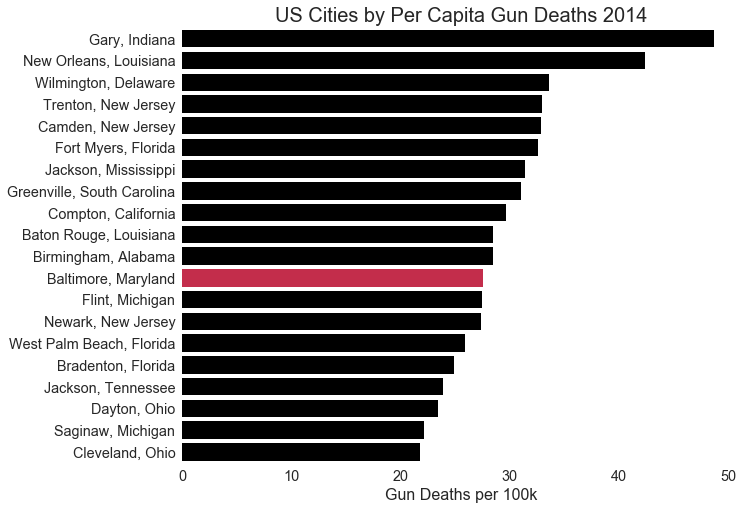

In [24]:
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
colors = ['crimson' if x=='Baltimore, Maryland' else 'black' for x in top_cities_2014.index]
sns.barplot(x=top_cities_2014.pc_killed, 
            y=top_cities_2014.index,
            data=top_cities_2014, palette=colors)


ax.set_title("US Cities by Per Capita Gun Deaths 2014", fontsize=20)
ax.set_xlabel('Gun Deaths per 100k',fontsize=16)
ax.set_ylabel("")
plt.tick_params(labelsize='large')
       
sns.despine(left=True, bottom=True)
plt.savefig('../images/cities_pc_2014.png')

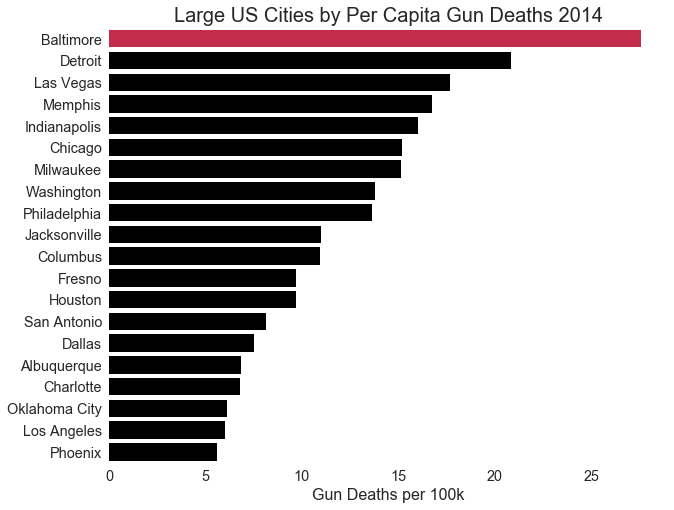

In [25]:
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
colors = ['crimson' if x=='Baltimore' else 'black' for x in top_large_cities_2014.index]
sns.barplot(x=top_large_cities_2014.pc_killed, 
            y=top_large_cities_2014.index,
            data=top_large_cities_2014, palette=colors)

ax.set_title("Large US Cities by Per Capita Gun Deaths 2014", fontsize=20)
ax.set_xlabel('Gun Deaths per 100k',fontsize=16)
ax.set_ylabel("")
plt.tick_params(labelsize='large')

sns.despine(left=True, bottom=True)
plt.savefig('../images/large_cities_2014.png')